In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

In [2]:
## 加载数据
data = pd.read_csv('train_XY.csv')
data.head()

,speed,total_voltage,total_current,soc,temp_max,temp_min,motor_voltage,motor_current,label,time_seconds
0,0.0,539.1,-19.0,46.0,32.0,21.0,0.0,0.0,0.0,10.0
1,0.0,539.1,-19.0,46.0,32.0,21.0,0.0,0.0,0.0,10.0
2,0.0,539.1,-19.0,46.0,32.0,21.0,0.0,0.0,0.0,10.0
3,0.0,539.1,-19.0,46.0,32.0,21.0,0.0,0.0,0.0,10.0
4,0.0,539.1,-19.0,46.0,32.0,21.0,0.0,0.0,0.0,10.0


In [3]:
x,y = data.ix[:, 1:-2],data.ix[:,0]
x.head()

,total_voltage,total_current,soc,temp_max,temp_min,motor_voltage,motor_current
0,539.1,-19.0,46.0,32.0,21.0,0.0,0.0
1,539.1,-19.0,46.0,32.0,21.0,0.0,0.0
2,539.1,-19.0,46.0,32.0,21.0,0.0,0.0
3,539.1,-19.0,46.0,32.0,21.0,0.0,0.0
4,539.1,-19.0,46.0,32.0,21.0,0.0,0.0


In [4]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: speed, dtype: float64

In [5]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(len(x_train))

print(len(x_test))
print(type(x_train))
print(type(y_train))

947972
406274
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


[0]	validation_0-rmse:21.7065	validation_1-rmse:21.6721
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:19.6865	validation_1-rmse:19.6558
[2]	validation_0-rmse:17.8794	validation_1-rmse:17.8536
[3]	validation_0-rmse:16.2642	validation_1-rmse:16.2432
[4]	validation_0-rmse:14.8184	validation_1-rmse:14.8031
[5]	validation_0-rmse:13.5338	validation_1-rmse:13.5239
[6]	validation_0-rmse:12.3907	validation_1-rmse:12.3858
[7]	validation_0-rmse:11.3768	validation_1-rmse:11.3777
[8]	validation_0-rmse:10.4803	validation_1-rmse:10.4875
[9]	validation_0-rmse:9.68958	validation_1-rmse:9.70301
[10]	validation_0-rmse:8.99415	validation_1-rmse:9.01444
[11]	validation_0-rmse:8.39041	validation_1-rmse:8.41598
[12]	validation_0-rmse:7.85818	validation_1-rmse:7.89112
[13]	validation_0-rmse:7.39588	validation_1-rmse:7.43424
[14]	validation_0-rmse:6.99446	validation_1-rmse:7.03

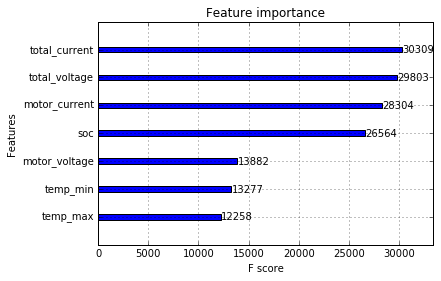

In [6]:
model = xgb.XGBRegressor(max_depth=10, learning_rate=0.1, n_estimators=682, min_child_weight=40, 
                         seed=0, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=0,
                         silent=True, objective='reg:linear', n_jobs=-1)
model.fit(x_train, y_train,eval_metric='rmse', eval_set=[(x_train, y_train),(x_test, y_test)], verbose=True, early_stopping_rounds=10)

# 对测试集进行预测
ans = model.predict(x_test)


# 显示重要特征
plot_importance(model)
plt.show()

In [7]:
from sklearn import metrics
print ("MSE:",metrics.mean_squared_error(y_test, ans))

MSE: 18.44532741538211


In [8]:
print("r2_score:", metrics.r2_score(y_test, ans))
ans2 = model.predict(x_train)
print("MSE2:", metrics.mean_squared_error(y_train, ans2))
print("r2_score2:", metrics.r2_score(y_train, ans2))

r2_score: 0.9519989392047594
MSE2: 13.467615983661867
r2_score2: 0.9650278862399747


In [10]:
##  模型保存

import pickle 
with open('model/xgb_speed682.pickle', 'wb') as f:
    pickle.dump(model, f)